# Introduction 

This document explores a dataset containing information about Prosper's loan data. 

<b>We're specifically interested in learning about which kinds of loans yield the highest returns, and which loans have the lowest Annual Percentage Rate (APR).</b>

When you take out a loan, your interest rate represents the interest percentage you will be charged for borrowing the money, but does not include origination fees, closing fees, documentation fees, and other finance charges. 
We're looking at APR over interest rates because APR gives you a more comprehensive look at how much you’ll pay when you borrow money for a loan by factoring in additional fees. When it comes to APR vs. interest rate, the former more accurately represents the true cost of the loan.

## Table of contents

## Preliminary Wrangling and Cleaning


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

# Simplify the dataframe to only include relevant columns for this analysis
# Save df into a new variable to keep the original df untouched
df2 = df[['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'ListingCategory (numeric)', 'EstimatedReturn', 'LenderYield', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'IncomeRange', 'MonthlyLoanPayment']]

# high-level overview of data shape and composition
print(df2.shape)
print(df2.info())

(113937, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                    113937 non-null object
ListingCreationDate           113937 non-null object
Term                          113937 non-null int64
LoanStatus                    113937 non-null object
BorrowerAPR                   113912 non-null float64
ListingCategory (numeric)     113937 non-null int64
EstimatedReturn               84853 non-null float64
LenderYield                   113937 non-null float64
EmploymentStatus              111682 non-null object
IsBorrowerHomeowner           113937 non-null bool
CreditScoreRangeLower         113346 non-null float64
LoanMonthsSinceOrigination    113937 non-null int64
LoanOriginalAmount            113937 non-null int64
IncomeRange                   113937 non-null object
MonthlyLoanPayment            113937 non-null float64
dtypes: bool(1), float64(5), int64(4), object(5)
memory usage: 12.3+ MB
None


We are dealing with 113,937 rows and 15 features.  

In [126]:
# Visual assessment
df2.sample(10)

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ListingCategory (numeric),EstimatedReturn,LenderYield,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,LoanMonthsSinceOrigination,LoanOriginalAmount,IncomeRange,MonthlyLoanPayment,CreditScore,ListingCategory,log_loan_amount
90841,5E51357382048020627D862,2013-03-13 05:50:42.980000000,36,Current,0.09333,Home Improvement,0.05100,0.0699,Employed,True,800.0,12,3500,"$100,000+",109.66,Exceptional,Home Improvement,3.544068
94343,925B34672192710117AA1A9,2009-10-28 10:45:46.743000000,36,Completed,0.37453,Debt Consolidation,0.13990,0.3400,Full-time,False,660.0,52,4000,"$1-24,999",180.94,Fair,Debt Consolidation,3.602060
60821,AF563384847398274F270A8,2007-03-17 13:19:10.727000000,36,Completed,0.15010,Not Available,NaN,0.1330,Full-time,False,660.0,84,5000,"$50,000-74,999",171.62,Fair,Not Available,3.698970
101514,BC6533653899943226D3E7E,2006-07-07 21:12:32.320000000,36,Chargedoff,0.25747,Not Available,NaN,0.2449,NaN,True,540.0,92,2550,Not displayed,101.37,Very Poor,Not Available,3.406540
59628,558733892902938906B489B,2007-05-13 19:07:53.107000000,36,Completed,0.12700,Not Available,NaN,0.1100,Full-time,False,680.0,82,9200,"$25,000-49,999",305.57,Good,Not Available,3.963788
99706,7EC13525085855965C1DB11,2011-08-28 20:37:49.483000000,36,Defaulted,0.34621,Business,0.15610,0.2999,Full-time,False,640.0,31,7500,"$75,000-99,999",322.47,Fair,Business,3.875061
13347,CC0A3597677632348D64473,2013-12-18 12:32:58.580000000,60,Current,0.20347,Debt Consolidation,0.08027,0.1695,Self-employed,True,740.0,3,15000,"$75,000-99,999",380.49,Very Good,Debt Consolidation,4.176091
54265,A8643575858323057E0F4E4,2013-04-23 06:34:54.030000000,60,Current,0.15629,Auto,0.07820,0.1234,Full-time,True,680.0,11,12000,"$50,000-74,999",275.13,Good,Auto,4.079181
23403,05613517398720177500543,2011-06-06 12:14:20.653000000,36,Completed,0.35643,Debt Consolidation,0.08870,0.3099,Employed,False,640.0,33,3537,"$25,000-49,999",154.02,Fair,Debt Consolidation,3.548635
113008,CD7B35625371578007DD108,2012-11-10 12:35:27.130000000,36,Completed,0.09736,Debt Consolidation,0.05490,0.0739,Employed,False,740.0,16,15400,"$50,000-74,999",485.36,Very Good,Debt Consolidation,4.187521


Let's see if there are any null values in our dataset

In [129]:
df2.isnull().sum()

ListingKey                        0
ListingCreationDate               0
Term                              0
LoanStatus                        0
BorrowerAPR                       0
ListingCategory (numeric)         0
EstimatedReturn               28360
LenderYield                       0
EmploymentStatus               1634
IsBorrowerHomeowner               0
CreditScoreRangeLower             0
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
IncomeRange                       0
MonthlyLoanPayment                0
CreditScore                       0
ListingCategory                   0
log_loan_amount                   0
dtype: int64

In [130]:
# drop null credit score and Employment Status null values 
df2 = df2.dropna(subset = ['CreditScoreRangeLower', 'EmploymentStatus'], how = 'any' )

In [131]:
# Check to see if it worked
df2.isnull().sum()

ListingKey                        0
ListingCreationDate               0
Term                              0
LoanStatus                        0
BorrowerAPR                       0
ListingCategory (numeric)         0
EstimatedReturn               26726
LenderYield                       0
EmploymentStatus                  0
IsBorrowerHomeowner               0
CreditScoreRangeLower             0
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
IncomeRange                       0
MonthlyLoanPayment                0
CreditScore                       0
ListingCategory                   0
log_loan_amount                   0
dtype: int64

It is normal to have null values for Estimated Return Column because this column only has data for loans that originated after July 2009.

We notice that it's going to be difficult to use the credit score column since its values are not continuous. Let's create categories for different credit scores and use them in our analysis. 

In [70]:
# convert Credit Score into ordered categorical values

# Bin edges 
bin_edges = [-1, 1, 579, 669, 739, 799, 900] 

# Labels for our credit scores
bin_names = ['Not Available', 'Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

# Create CreditScore column
df2['CreditScore'] = pd.cut(df2['CreditScoreRangeLower'], bin_edges, labels=bin_names)

# Let's take a randon sample to see if our categories work
df2.sample(5)

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ListingCategory (numeric),EstimatedReturn,LenderYield,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,LoanMonthsSinceOrigination,LoanOriginalAmount,IncomeRange,MonthlyLoanPayment,CreditScore,ListingCategory,log_loan_amount
33204,C6EA3600357821771039559,2014-01-13 22:28:02.833000000,60,Current,0.20808,Wedding Loans,0.08172,0.1740,Employed,False,660.0,2,20000,"$75,000-99,999",512.23,Fair,Wedding Loans,4.301030
57464,1B5B3397232809055A51607,2007-08-09 08:45:19.150000000,36,Defaulted,0.25083,Not Available,NaN,0.2295,Full-time,False,560.0,79,5000,"$25,000-49,999",196.03,Very Poor,Not Available,3.698970
95409,246535854524082054B46DA,2013-08-07 10:13:18.207000000,36,Current,0.28032,Debt Consolidation,0.10510,0.2319,Employed,False,660.0,7,10000,"$25,000-49,999",393.33,Fair,Debt Consolidation,4.000000
58140,A7453506288059116A3801B,2011-01-21 10:18:51.947000000,36,Completed,0.28488,Debt Consolidation,0.13600,0.2399,Full-time,True,720.0,38,6500,"$75,000-99,999",258.40,Good,Debt Consolidation,3.812913
100855,616B3415649282291A95674,2008-03-08 18:10:36.687000000,36,Completed,0.17677,Debt Consolidation,NaN,0.1450,Full-time,False,620.0,72,7500,"$75,000-99,999",261.83,Fair,Debt Consolidation,3.875061


Listing Categories are currently numeric. Let's convert these values into their names to make them more explicite. 

In [15]:
df2['ListingCategory (numeric)'] = df2['ListingCategory (numeric)'].replace({
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'})


C:\Users\nasty\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
# Rename the column
df2['ListingCategory'] = df2['ListingCategory (numeric)']

C:\Users\nasty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Some categories in the dataset are ordinal, however, they are currently of type object. Let's convert these to categorical type.  

In [132]:
# convert Term, IncomeRange, CreditScoreRangeLower, into ordered categorical types
ordinal_var_dict = {
                    'Term':        [12, 36, 60],
                    'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+'],
                    'CreditScore': ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'],
                    'LoanStatus':  ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Cancelled',
                                    'Past Due (1-15 days)',  'Past Due (16-30 days)',  'Past Due (31-60 days)', 
                                    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df2[var] = df2[var].astype(ordered_var)

Test to see if they converted correctly. 

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113346 entries, 0 to 113936
Data columns (total 17 columns):
ListingKey                    113346 non-null object
ListingCreationDate           113346 non-null object
Term                          113346 non-null category
LoanStatus                    113346 non-null category
BorrowerAPR                   113346 non-null float64
ListingCategory (numeric)     113346 non-null object
EstimatedReturn               84853 non-null float64
LenderYield                   113346 non-null float64
EmploymentStatus              111680 non-null object
IsBorrowerHomeowner           113346 non-null bool
CreditScoreRangeLower         113346 non-null float64
LoanMonthsSinceOrigination    113346 non-null int64
LoanOriginalAmount            113346 non-null int64
IncomeRange                   113346 non-null category
MonthlyLoanPayment            113346 non-null float64
CreditScore                   113213 non-null category
ListingCategory               113

## Univariate Data Exploration

### Quantitative Variables

We'll start by looking at our two variables of interest: Borrower APR and Estimated Return. 
We'll then proceed in looking at the distribution of other quantitative variables. 

#### Borrower APR

Text(0.5, 0, 'Borrower APR')

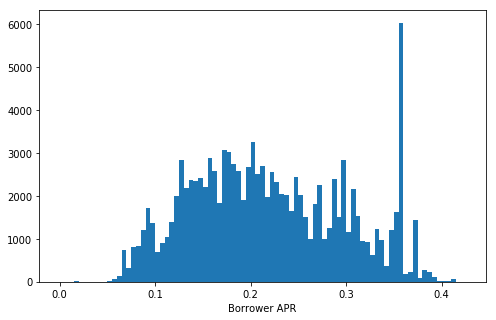

In [21]:
binsize = 0.005
bins = np.arange(0, df2.BorrowerAPR.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')

Borrower APR is slightly skewed to the left. We can see some peaks throughout the whole distribution, the most obvious one being at 3.5. This seems to show that there are certain preconstructed borrower annual percentage rates, the most common one being 3.5%.  

In [22]:
df2.BorrowerAPR.describe()

count    113346.000000
mean          0.219027
std           0.080285
min           0.006530
25%           0.156290
50%           0.209860
75%           0.283860
max           0.423950
Name: BorrowerAPR, dtype: float64

#### Estimated Return

(0, 0.25)

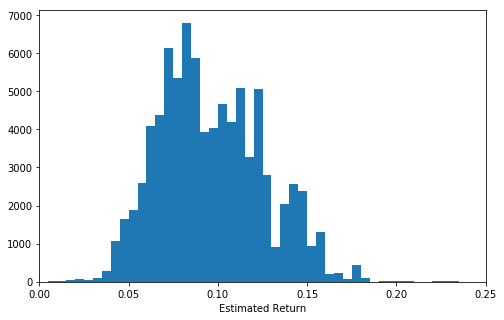

In [23]:
binsize = 0.005
bins = np.arange(0, df2.EstimatedReturn.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'EstimatedReturn', bins = bins);
plt.xlabel('Estimated Return')
plt.xlim(0, 0.25)

In [24]:
df2.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

The average return for a loan is 9.6%. The max in the dataset is 28%. 

#### Loan Months Since Origination 

Text(0.5, 0, 'Loan Months Since Origination')

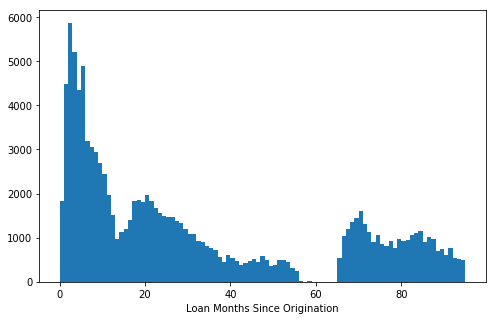

In [25]:
binsize = 1
bins = np.arange(0, df2.LoanMonthsSinceOrigination.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'LoanMonthsSinceOrigination', bins = bins);
plt.xlabel('Loan Months Since Origination')

It's interesting to see that there are no loans around the 60 month range. 

#### Loan Original Amount

Text(0.5, 0, 'Loan Original Amount')

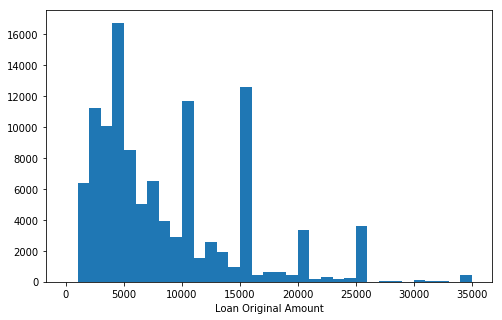

In [27]:
binsize = 1000
bins = np.arange(0, df2.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount')

There's a long tail in the distribution, so let's put it on a log scale instead

(600, 50000)

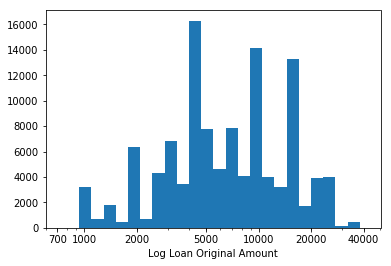

In [28]:
log_binsize = 0.07
bins = 10 ** np.arange(1.5, np.log(df2.LoanOriginalAmount.max())+log_binsize, log_binsize)
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

plt.hist(data = df2, x= 'LoanOriginalAmount', bins = bins);

plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Log Loan Original Amount')
plt.xlim(600, 50000)

#### Monthly Loan Payment

Text(0.5, 0, 'Monthly Loan Payment')

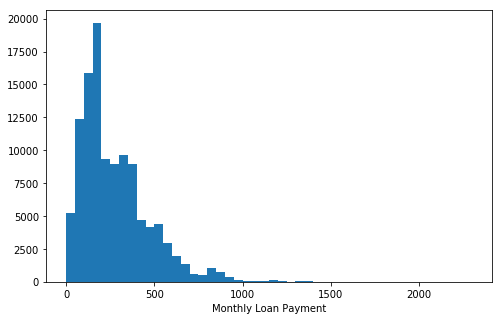

In [29]:
binsize = 50
bins = np.arange(0, df2.MonthlyLoanPayment.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'MonthlyLoanPayment', bins = bins);
plt.xlabel('Monthly Loan Payment')


Let's use a log scale for Monthly Loan Payment as well.

(20, 2500)

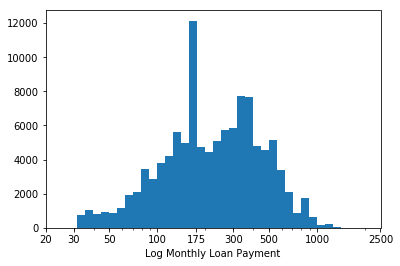

In [30]:
log_binsize = 0.05
bins = 10 ** np.arange(1.5, np.log(df2.MonthlyLoanPayment.max())+log_binsize, log_binsize)
ticks = [20, 30, 50, 100, 175, 300, 500, 1000, 2500]

plt.hist(data = df2, x= 'MonthlyLoanPayment', bins = bins);

plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Log Monthly Loan Payment')
plt.xlim(20, 2500)

### Ordinal Variables 

#### Term, Income Range and Credit Score

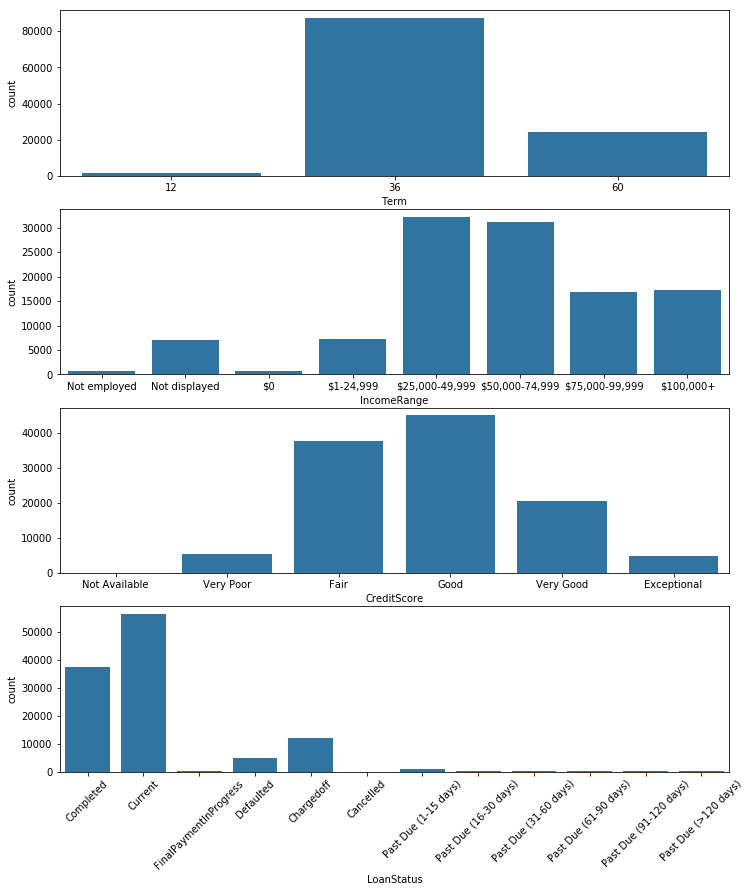

In [71]:
# let's plot all four ordinary variables together to get an idea of each distribution.

fig, ax = plt.subplots(nrows=4, figsize = [12,14])

default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = df2, x = 'IncomeRange', color = default_color, ax = ax[1])
sb.countplot(data = df2, x = 'CreditScore', color = default_color, ax = ax[2])
sb.countplot(data = df2, x = 'LoanStatus', color = default_color, ax = ax[3])

plt.xticks(rotation= 45)

plt.show()

### Categorical Variables 

### Employment Status, Is Borrower Homeowner	

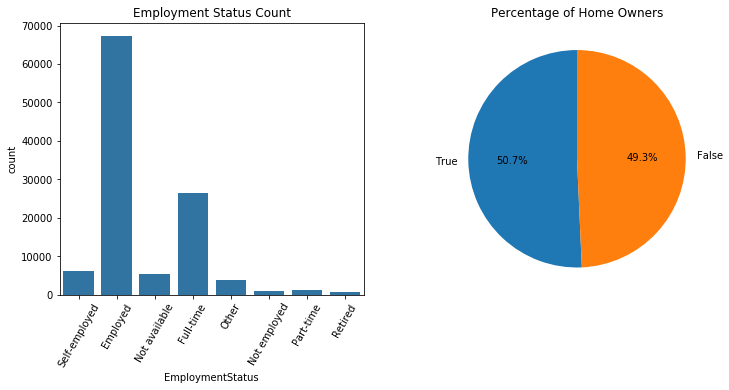

In [32]:
fig, ax = plt.subplots(ncols=2, figsize = [12,5])

default_color = sb.color_palette()[0]

sb.countplot(data = df2, x = 'EmploymentStatus', color = default_color, ax = ax[0])
plt.pie(df2.IsBorrowerHomeowner.value_counts().values, labels = df2.IsBorrowerHomeowner.value_counts().index,
        startangle = 90, autopct='%0.01f%%');

plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=60)

ax[0].set_title('Employment Status Count')
ax[1].set_title('Percentage of Home Owners')

plt.show()

Finally, let's look at the distrubution of Listing Categories.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

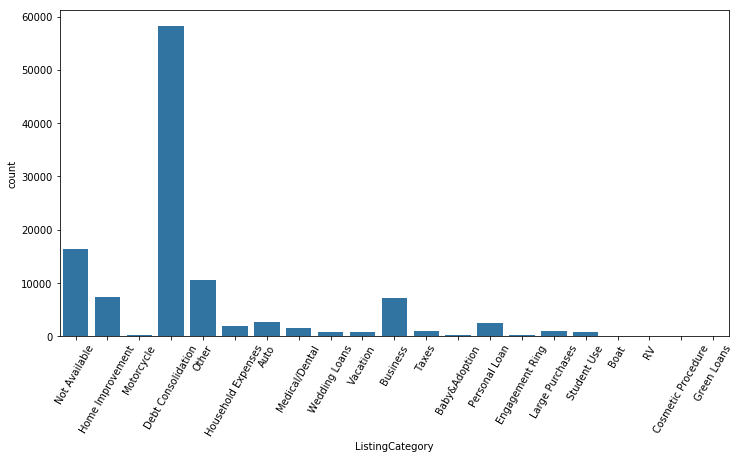

In [33]:
plt.figure(figsize = [12, 6])
default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'ListingCategory', color = default_color)
plt.xticks(rotation = 60)

Most Listing Categories are Debt Consolidation. Other popular ones inclure Home Improvement, Auto, Business, and Other. 

## Bivariate Data Exploration 

### Correlations 
Let's look at pairwise correlations present between features in the data.

In [34]:
numeric_vars = ['EstimatedReturn', 'BorrowerAPR', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categoric_vars = ['IncomeRange', 'CreditScore', 'IsBorrowerHomeowner']

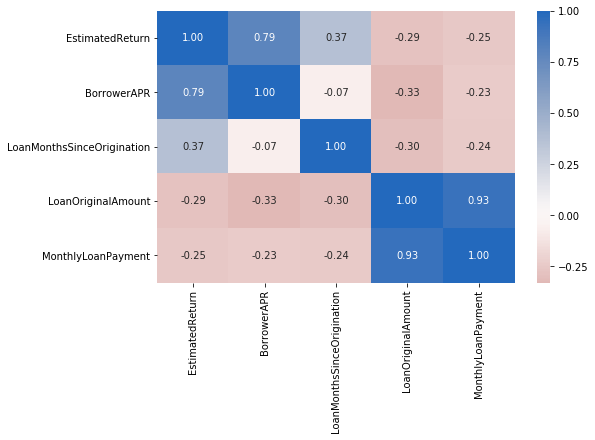

In [133]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df2[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [36]:
# plot matrix: sample 500 data points so that plots are clearer and
# they render faster
samples = np.random.choice(df2.shape[0], 500, replace = False)
df2_samp = df2.loc[samples,:]

C:\Users\nasty\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nasty\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


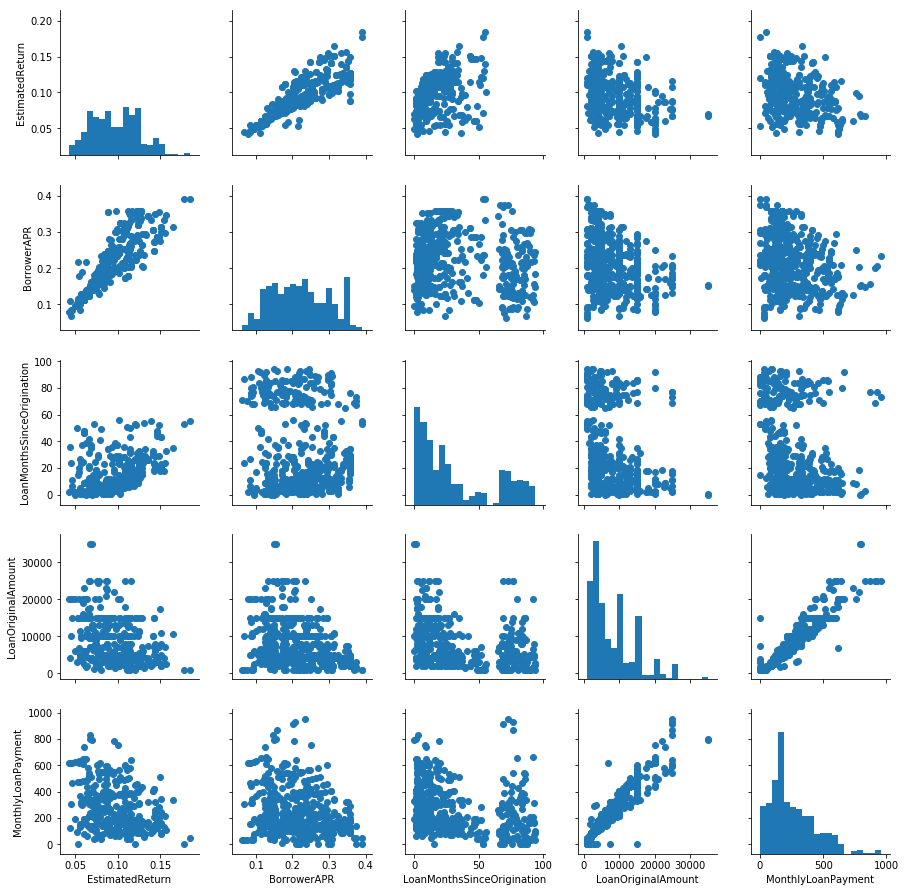

In [37]:
g = sb.PairGrid(data = df2_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected, there is a high correlation between Borrower APR and Estimated Return. Correlations between other values are not significant so more exploration will be required. 

Loan Original Amount and Monthly Loan Payment were scaled using a log function at the beginning of our analysis, but they weren't in this Pair Grid. Let's compare Estimated Return and the log values of these two features.

Let's create our log function

In [135]:
# log function to easily transform data to its log values
def log_trans(x, inverse = False):
    if not inverse:
        
        return np.log10(x)
    else:
        return np.power(10, x)

<b>Estimated Return VS Loan Original Amount</b>

Text(0.5, 0, 'Log Loan Original Amount')

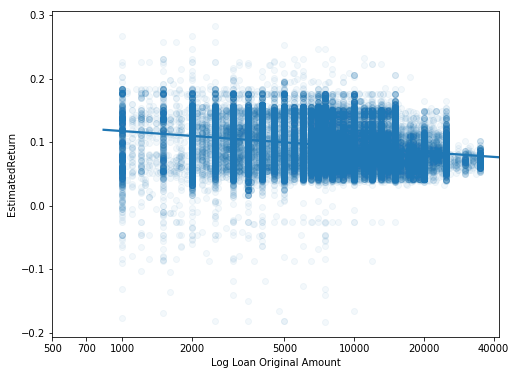

In [136]:
# Create a new column that has the log values of 'LoanOriginalAmount'
df2['log_loan_amount'] = df2['LoanOriginalAmount'].apply(log_trans)

# Create visualization
plt.figure(figsize = [8, 6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

sb.regplot(data = df2, x= 'log_loan_amount', y = 'EstimatedReturn', scatter_kws={'alpha':0.05});

plt.xticks(log_trans(np.array(ticks)), ticks)
plt.xlabel('Log Loan Original Amount')


We can see a slight negative correlation between the Estimated Return and the log of the Loan Amount. However, if on average smaller loans tend to yield higher returns, there is also more variability in returns the smaller the loan. 

This means that there is more risk associated with smaller loans. 

<b>Estimated Return VS Loan Months Since Origination</b>

In [137]:
# take only the completed loans
df2_completed = df2.query('LoanStatus == "Completed"')

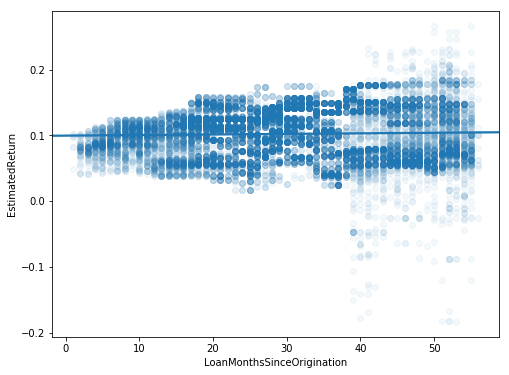

In [138]:
# Create visualization
plt.figure(figsize = [8, 6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

sb.regplot(data = df2_completed, x= 'LoanMonthsSinceOrigination', y = 'EstimatedReturn', scatter_kws={'alpha':0.05});



The duration of the loan seems to have no impact on return. We can see from this graph however that longer loans are riskier since they have higher variability in return. 

Let's have a look at Estimated Returns and our categorical features now. 

<b>Estimated Returns VS Listing Category</b>

There are 20 different listing categories, some of which are not represented much. Let's take only the categories where we have over 2500 loans of that type.  

In [139]:
THRESHOLD = 2500
loan_frequency = df2['ListingCategory'].value_counts()
idx = np.sum(loan_frequency > THRESHOLD)

most_loans = loan_frequency.index[:idx]
df2_sub = df2.loc[df2['ListingCategory'].isin(most_loans)]

loan_mean = df2_sub.groupby('ListingCategory').mean()

# List our categories with over 2500 loans of that type
df2_sub['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         14607
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Name: ListingCategory, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

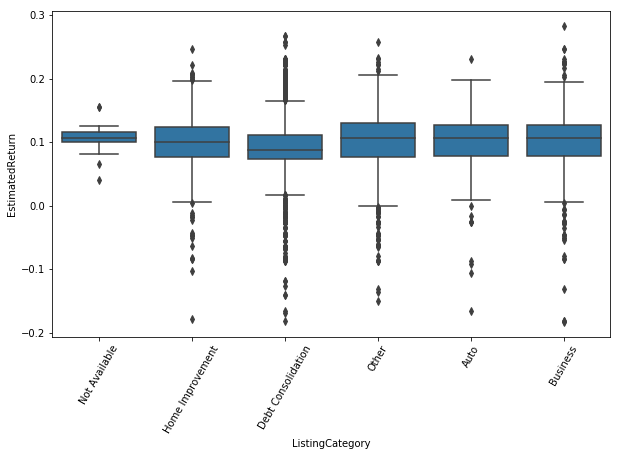

In [141]:
plt.figure(figsize = [10, 6])
sb.boxplot(data = df2_sub, x = 'ListingCategory', y = 'EstimatedReturn', color = default_color)
plt.xticks(rotation = 60)

What is the average return for each listing category?

In [142]:
loan_mean.EstimatedReturn

ListingCategory
Auto                  0.104257
Business              0.103527
Debt Consolidation    0.092565
Home Improvement      0.099917
Not Available         0.106649
Other                 0.103885
Name: EstimatedReturn, dtype: float64

Let's plot the average Estimated Return for the most popular loans

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

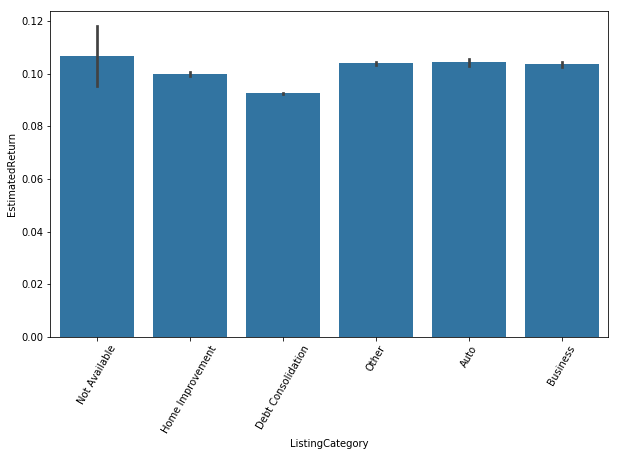

In [143]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 6])
sb.barplot(data = df2_sub, x = 'ListingCategory', y = 'EstimatedReturn', color = base_color)
plt.xticks(rotation = 60)

As we can tell, investing in a Home Improvement Loan and Dept Consolidation is slightly less profitable and the others. 

<b>BorrowerAPR and Estimated Return VS Credit Score and Income Range</b>

<Figure size 1296x720 with 0 Axes>

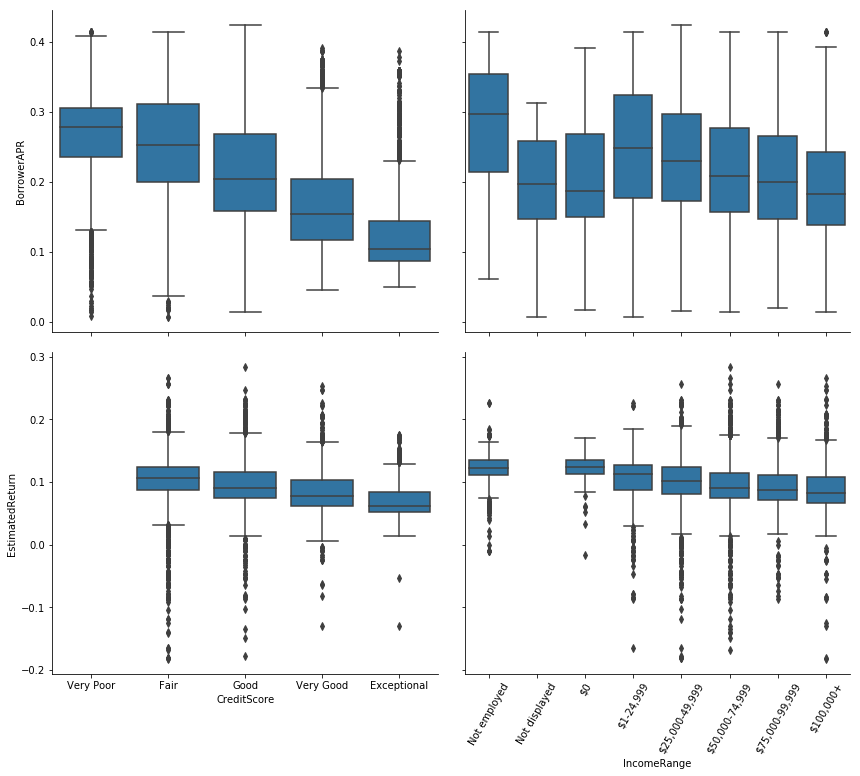

In [144]:
# Boxplot function
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

# Create visualization
plt.figure(figsize = [18, 10])
g = sb.PairGrid(data = df2, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['CreditScore', 'IncomeRange'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

<b>BorrowerAPR and Estimated Return VS Is Homeowner and Employment Status</b>

<Figure size 1296x1080 with 0 Axes>

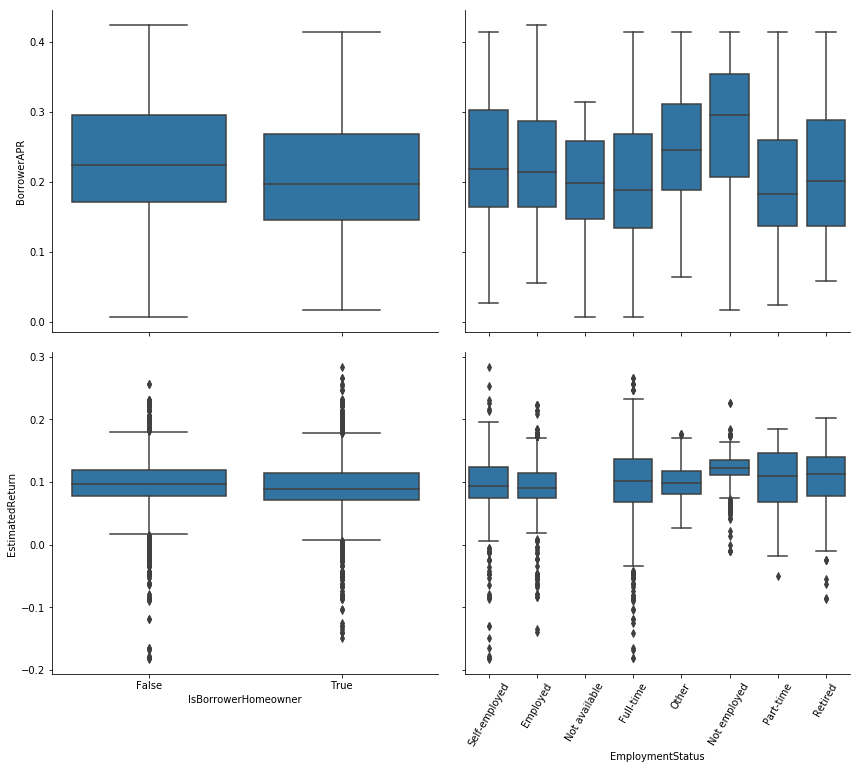

In [145]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df2, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['IsBorrowerHomeowner', 'EmploymentStatus'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

<b>BorrowerAPR and Estimated Return VS Term and Loan Status</b>

<Figure size 1296x1080 with 0 Axes>

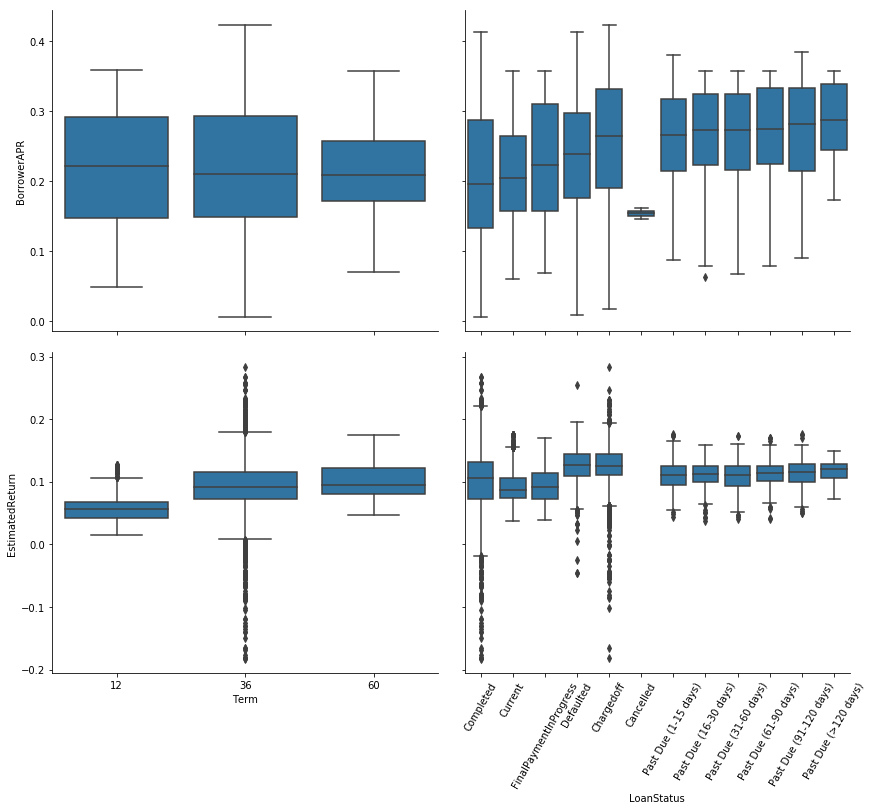

In [146]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df2, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['Term', 'LoanStatus'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

## Multivariable Exploration of Data

In [147]:
df2_business = df2[df2['ListingCategory'] == "Business"]

<Figure size 1296x720 with 0 Axes>

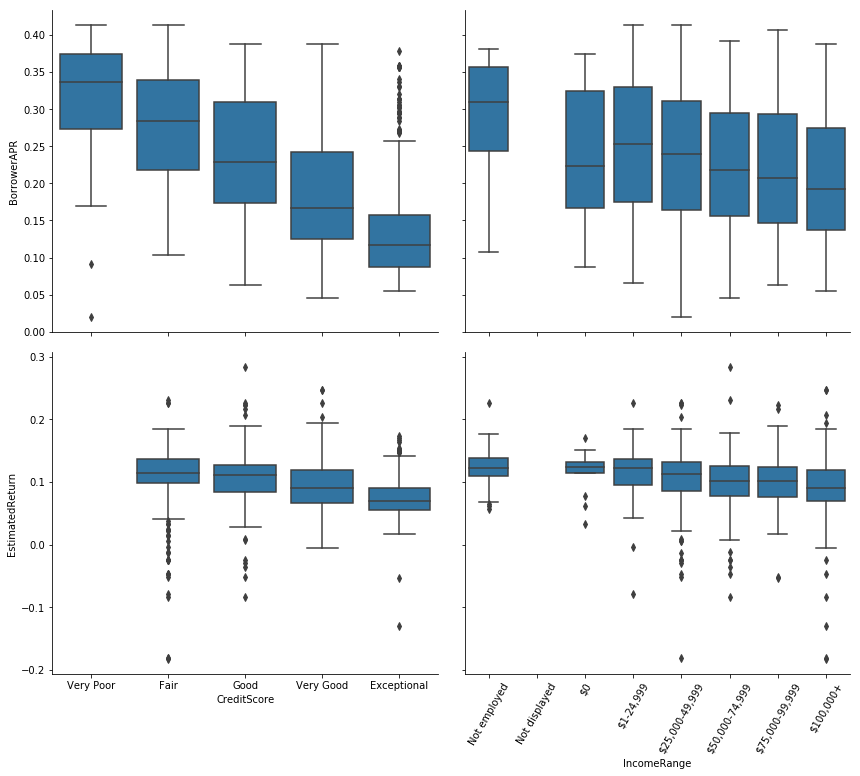

In [148]:
# Boxplot function
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

# Create visualization
plt.figure(figsize = [18, 10])
g = sb.PairGrid(data = df2_business, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['CreditScore', 'IncomeRange'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

<b>BorrowerAPR and Estimated Return VS Is Homeowner and Employment Status</b>

<Figure size 1296x1080 with 0 Axes>

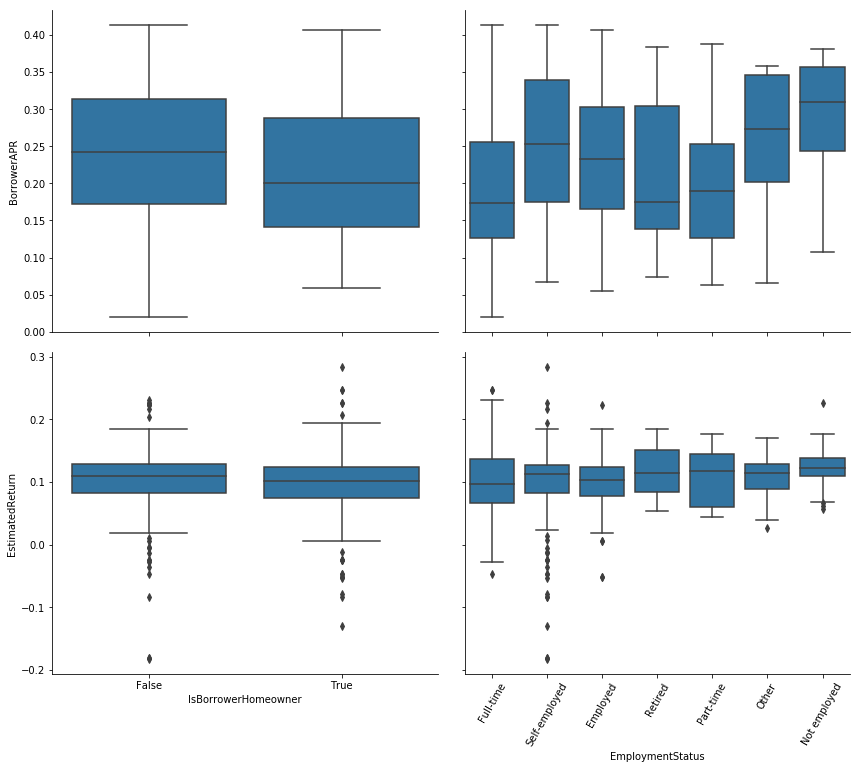

In [149]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df2_business, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['IsBorrowerHomeowner', 'EmploymentStatus'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

<b>BorrowerAPR and Estimated Return VS Term and Loan Status</b>

<Figure size 1296x1080 with 0 Axes>

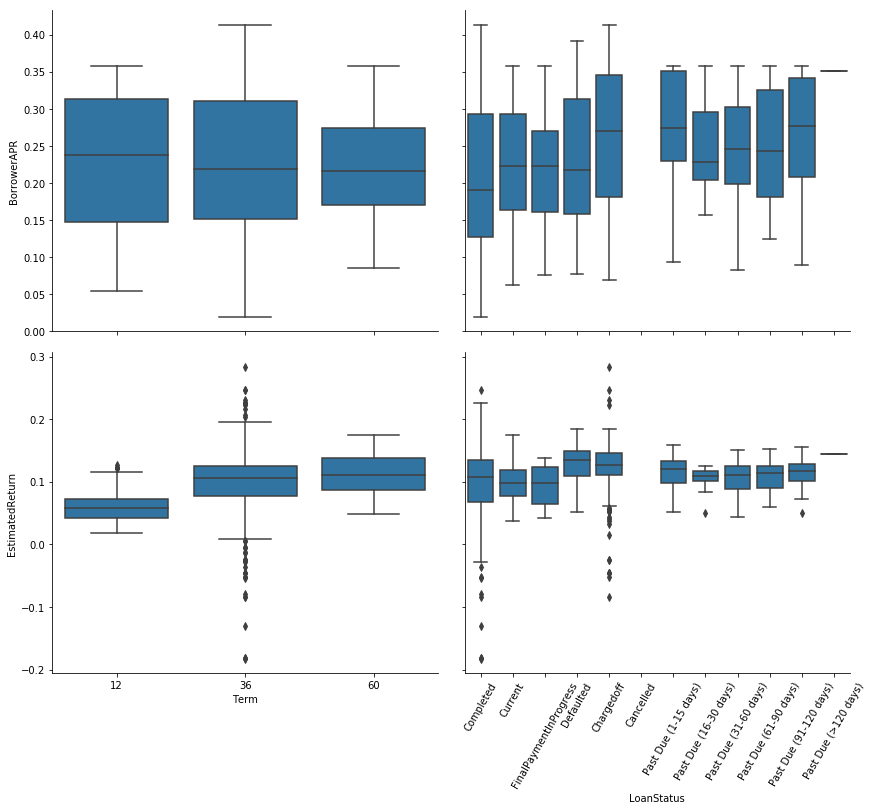

In [113]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df2_business, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['Term', 'LoanStatus'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

In [114]:
df2_sub.CreditScore.value_counts()

Good           40692
Fair           33502
Very Good      18540
Very Poor       5131
Exceptional     4372
Name: CreditScore, dtype: int64

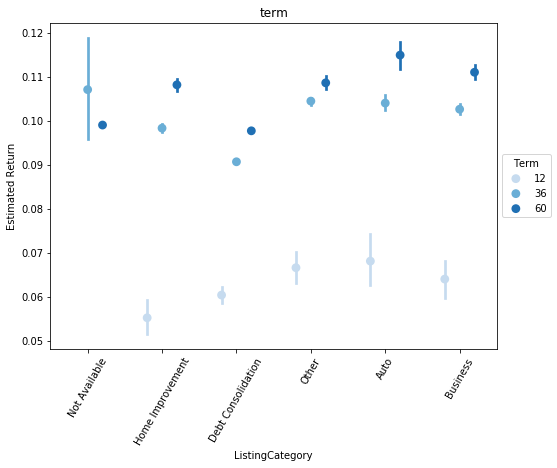

In [115]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df2_sub, x = 'ListingCategory', y = 'EstimatedReturn',  hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('term')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)
ax.legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.show();


In [116]:
df2_60 = df2_sub[df2_sub['Term'] == 60]

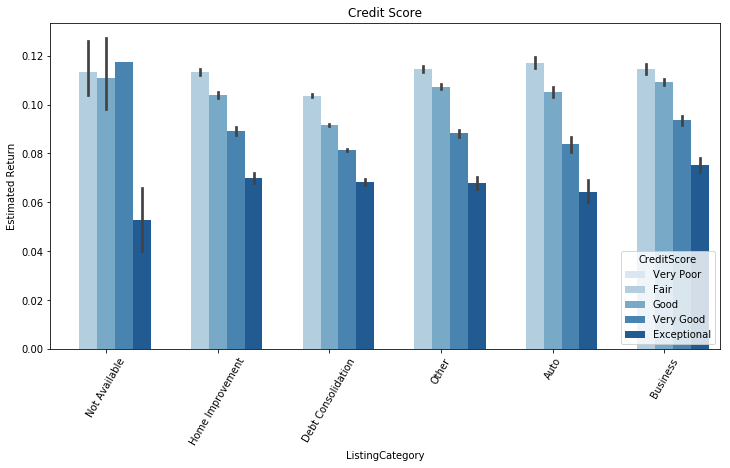

In [117]:
fig = plt.figure(figsize = [12,6])
ax = sb.barplot(data = df2_sub, x = 'ListingCategory', y = 'EstimatedReturn',  hue = 'CreditScore', palette = 'Blues')
plt.title('Credit Score')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)

plt.show();


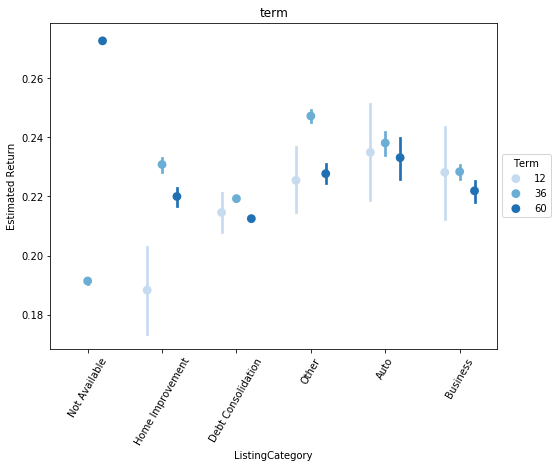

In [118]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df2_sub, x = 'ListingCategory', y = 'BorrowerAPR',  hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('term')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)
ax.legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.show();

Text(0, 0.5, 'Estimated Return')

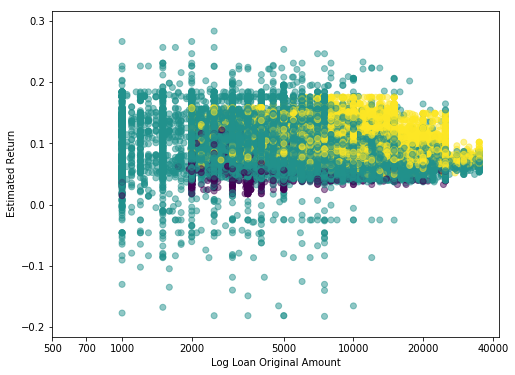

In [119]:
# Create a new column that has the log values of 'LoanOriginalAmount'
df2['log_loan_amount'] = df2['LoanOriginalAmount'].apply(log_trans)

# Create visualization
plt.figure(figsize = [8, 6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

plt.scatter(data = df2, x= 'log_loan_amount', y = 'EstimatedReturn', c = 'Term', alpha = 0.5);

plt.xticks(log_trans(np.array(ticks)), ticks)
plt.xlabel('Log Loan Original Amount')
plt.ylabel('Estimated Return')

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = 0                Fair
1                Good
3         Exceptional
4                Good
5           Very Good
6                Good
7                Good
8         Exceptional
9         Exceptional
10               Fair
11               Fair
12               Good
13          Very Good
14          Very Good
15               Good
16               Fair
17          Very Good
18          Very Good
19               Good
20               Fair
21               Fair
22               Good
23               Good
24               Fair
25               Good
26               Fair
27               Good
28               Good
29          Very Good
30          Very Good
             ...     
113904           Fair
113905      Very Good
113906      Very Good
113907           Fair
113908           Good
113909    Exceptional
113910           Fair
113911           Fair
113912    Exceptional
113913      Very Good
113915           Fair
113916           Fair
113917           Fair
113918      Very Good
113919           Good
113920      Very Good
113922           Fair
113923           Good
113924           Fair
113925           Good
113927      Very Good
113928      Very Good
113929           Fair
113930           Good
113931    Exceptional
113932           Good
113933           Good
113934           Good
113935           Good
113936           Good
Name: CreditScore, Length: 107706, dtype: category
Categories (6, object): [Not Available < Very Poor < Fair < Good < Very Good < Exceptional].

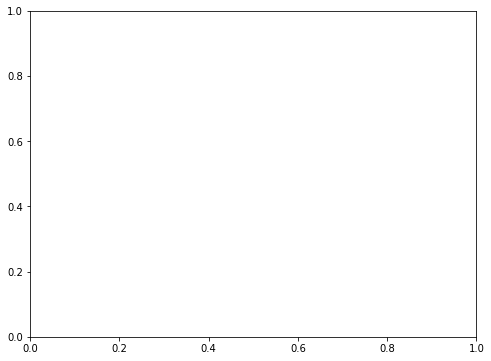

In [120]:
# Create a new column that has the log values of 'LoanOriginalAmount'
df2['log_loan_amount'] = df2['LoanOriginalAmount'].apply(log_trans)

# Create visualization
plt.figure(figsize = [8, 6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

plt.scatter(data = df2_credit, x= 'log_loan_amount', y = 'EstimatedReturn', c = 'CreditScore');

plt.xticks(log_trans(np.array(ticks)), ticks)
plt.xlabel('Log Loan Original Amount')


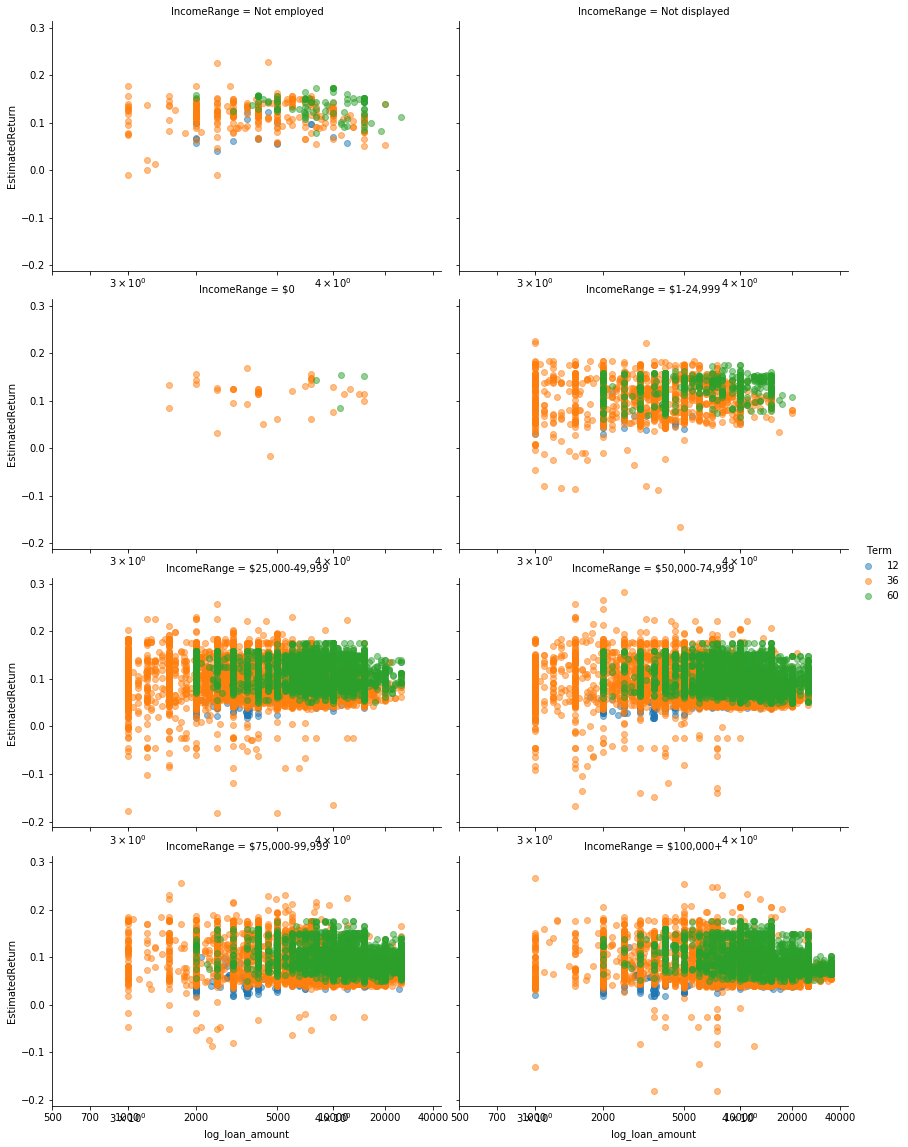

In [125]:
# plotting

g = sb.FacetGrid(data = df2_sub, col = 'IncomeRange', hue = 'Term', col_wrap = 2, height = 4, aspect = 1.5)
g.map(plt.scatter, 'log_loan_amount','EstimatedReturn', alpha = 1/2)
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]
g.set(xticks = log_trans(np.array(x_ticks)), xticklabels = x_ticks)
g.add_legend()

In [108]:
df2_credit = df2.loc[df2['CreditScore'].isin(['Fair', 'Good', 'Very Good', 'Exceptional'])]


[Fair, Good, Exceptional, Very Good]
Categories (4, object): [Fair < Good < Very Good < Exceptional]